In [35]:
import numpy as np
import pandas as pd

In [36]:
%matplotlib inline

In [37]:
# load dataset into Pandas DataFrame
file = pd.ExcelFile('MedData.xlsx')
df = pd.read_excel(file, names=['f1','f2','target'])
df

,f1,f2,target
0,700,0.14,2
1,640,0.15,2
2,690,0.15,2
3,550,0.13,2
4,650,0.15,2
...,...,...,...
95,670,0.23,3
96,630,0.19,3
97,650,0.20,3
98,620,0.23,3


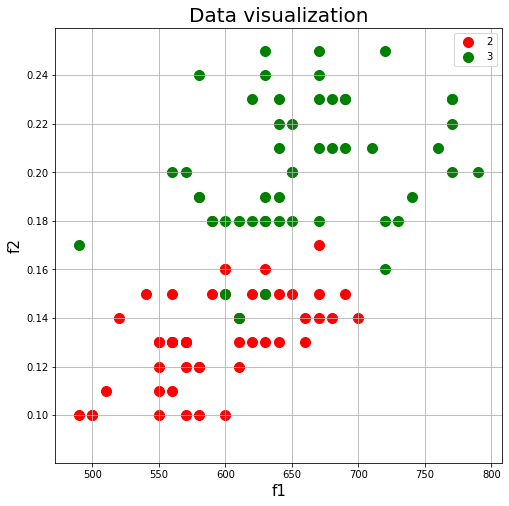

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('f1', fontsize = 15)
ax.set_ylabel('f2', fontsize = 15)
ax.set_title('Data visualization', fontsize = 20)
targets = [2, 3]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['target'] == target
    ax.scatter(df.loc[indicesToKeep, 'f1'],
               df.loc[indicesToKeep, 'f2'],
               c = color,
               s = 100)
ax.legend(targets)
ax.grid()

In [39]:
features = ['f1', 'f2']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
#allData = df.values
#y = allData[:,-1]

print(x[:10,:])


[[7.0e+02 1.4e-01]
 [6.4e+02 1.5e-01]
 [6.9e+02 1.5e-01]
 [5.5e+02 1.3e-01]
 [6.5e+02 1.5e-01]
 [5.7e+02 1.3e-01]
 [6.3e+02 1.6e-01]
 [4.9e+02 1.0e-01]
 [6.6e+02 1.3e-01]
 [5.2e+02 1.4e-01]]


In [40]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
x_stan = StandardScaler().fit_transform(x)
print(x_stan[:10,:])
y_stan = StandardScaler().fit_transform(y)
print(y_stan)

[[ 1.11900931 -0.65303909]
 [ 0.20924564 -0.41643072]
 [ 0.96738203 -0.41643072]
 [-1.15539985 -0.88964745]
 [ 0.36087292 -0.41643072]
 [-0.8521453  -0.88964745]
 [ 0.05761837 -0.17982236]
 [-2.06516352 -1.59947255]
 [ 0.5125002  -0.88964745]
 [-1.61028169 -0.65303909]]
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]


In [41]:
mean = x.sum(axis = 0)/len(x)
xVolna = x - mean
#print(mean)
#print(xVolna)

In [42]:
sigma = (pow((np.sum((xVolna ** 2), axis = 0)/len(xVolna)),0.5))
print(sigma)
print(np.std(x,axis=0))
normData = xVolna/sigma
print(np.max(normData, axis=0))
print(np.min(normData, axis=0))
sum(normData)
np.var(normData)

[6.59511941e+01 4.22639326e-02]
[6.59511941e+01 4.22639326e-02]
[2.4836548  1.94965293]
[-2.06516352 -1.59947255]


0.9999999999999997

In [43]:
summa = sum(x)
print(summa)

summa_st = sum(x_stan)
print(summa_st)

[6.262e+04 1.676e+01]
[-7.48290319e-14  5.48450174e-14]


In [44]:
#дисперсия
disp = np.var(x)
print(disp)

disp_st = np.var(x_stan)
print(disp_st)

100153.92235555999
0.9999999999999997


In [45]:
#стандартное отклонение
sko = np.std(x)
print(sko)

sko_st = np.std(x_stan)
print(sko_st)

316.4710450508229
0.9999999999999998


In [46]:
maxData = np.max(x, axis=0)
minData = np.min(x, axis=0)
codedData = (2 * x - maxData - minData)/(maxData - minData)

print(np.max(codedData, axis=0))
print(np.min(codedData, axis=0))
print(np.sum(codedData, axis=0))
print(np.std(codedData))
print(codedData)

[1. 1.]
[-1. -1.]
[-9.2        -9.86666667]
0.5054155605923595
[[ 0.4        -0.46666667]
 [ 0.         -0.33333333]
 [ 0.33333333 -0.33333333]
 [-0.6        -0.6       ]
 [ 0.06666667 -0.33333333]
 [-0.46666667 -0.6       ]
 [-0.06666667 -0.2       ]
 [-1.         -1.        ]
 [ 0.13333333 -0.6       ]
 [-0.8        -0.46666667]
 [-0.93333333 -1.        ]
 [-0.33333333 -0.33333333]
 [-0.26666667 -1.        ]
 [-0.2        -0.46666667]
 [-0.53333333 -0.6       ]
 [ 0.2        -0.46666667]
 [-0.53333333 -0.33333333]
 [-0.4        -1.        ]
 [-0.13333333 -0.33333333]
 [-0.53333333 -0.86666667]
 [-0.33333333  0.06666667]
 [-0.2        -0.6       ]
 [-0.06666667 -0.33333333]
 [-0.2        -0.73333333]
 [ 0.         -0.6       ]
 [ 0.13333333 -0.46666667]
 [ 0.26666667 -0.46666667]
 [ 0.2        -0.06666667]
 [-0.26666667 -0.33333333]
 [-0.46666667 -1.        ]
 [-0.6        -0.86666667]
 [-0.6        -1.        ]
 [-0.4        -0.73333333]
 [-0.26666667 -0.2       ]
 [-0.66666667 -0.33

In [47]:
maxNormData = np.max(normData, axis=0)
minNormData = np.min(normData, axis=0)
codedNormData = (2 * normData - maxNormData - minNormData)/(maxNormData - minNormData)
print(np.max(codedNormData, axis=0))
print(np.min(codedNormData, axis=0))
print(np.sum(codedNormData, axis=0))
print(np.std(codedNormData))
#print(codedNormData)


[1. 1.]
[-1. -1.]
[-9.2        -9.86666667]
0.5054155605923594


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(x)
normalized = scaler.transform(x)
print(normalized)
inversed = scaler.inverse_transform(normalized)
print(inversed)

[[ 4.00000000e-01 -4.66666667e-01]
 [-8.88178420e-16 -3.33333333e-01]
 [ 3.33333333e-01 -3.33333333e-01]
 [-6.00000000e-01 -6.00000000e-01]
 [ 6.66666667e-02 -3.33333333e-01]
 [-4.66666667e-01 -6.00000000e-01]
 [-6.66666667e-02 -2.00000000e-01]
 [-1.00000000e+00 -1.00000000e+00]
 [ 1.33333333e-01 -6.00000000e-01]
 [-8.00000000e-01 -4.66666667e-01]
 [-9.33333333e-01 -1.00000000e+00]
 [-3.33333333e-01 -3.33333333e-01]
 [-2.66666667e-01 -1.00000000e+00]
 [-2.00000000e-01 -4.66666667e-01]
 [-5.33333333e-01 -6.00000000e-01]
 [ 2.00000000e-01 -4.66666667e-01]
 [-5.33333333e-01 -3.33333333e-01]
 [-4.00000000e-01 -1.00000000e+00]
 [-1.33333333e-01 -3.33333333e-01]
 [-5.33333333e-01 -8.66666667e-01]
 [-3.33333333e-01  6.66666667e-02]
 [-2.00000000e-01 -6.00000000e-01]
 [-6.66666667e-02 -3.33333333e-01]
 [-2.00000000e-01 -7.33333333e-01]
 [-8.88178420e-16 -6.00000000e-01]
 [ 1.33333333e-01 -4.66666667e-01]
 [ 2.66666667e-01 -4.66666667e-01]
 [ 2.00000000e-01 -6.66666667e-02]
 [-2.66666667e-01 -3

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 7)


In [57]:
y_train.size

67

# Заполнение пропусков Data Frame

In [58]:
df = pd.DataFrame([[1, 2, None, 3], [4, None, 5, 6], 
                            [7, 8, 9, 10], [None, None, None, None]])
df

,0,1,2,3
0,1.0,2.0,NaN,3.0
1,4.0,NaN,5.0,6.0
2,7.0,8.0,9.0,10.0
3,NaN,NaN,NaN,NaN


In [60]:
print(df.fillna(0))
df

     0    1    2     3
0  1.0  2.0  0.0   3.0
1  4.0  0.0  5.0   6.0
2  7.0  8.0  9.0  10.0
3  0.0  0.0  0.0   0.0


,0,1,2,3
0,1.0,2.0,NaN,3.0
1,4.0,NaN,5.0,6.0
2,7.0,8.0,9.0,10.0
3,NaN,NaN,NaN,NaN


In [61]:
df.fillna(0, inplace=True)
df

,0,1,2,3
0,1.0,2.0,0.0,3.0
1,4.0,0.0,5.0,6.0
2,7.0,8.0,9.0,10.0
3,0.0,0.0,0.0,0.0


In [62]:
df = pd.DataFrame([[1, 2, None, 3], [4, None, 5, 6], 
                            [7, 8, 9, 10], [None, None, None, None]])
df

,0,1,2,3
0,1.0,2.0,NaN,3.0
1,4.0,NaN,5.0,6.0
2,7.0,8.0,9.0,10.0
3,NaN,NaN,NaN,NaN


In [64]:
df.fillna(method='pad')

,0,1,2,3
0,1.0,2.0,NaN,3.0
1,4.0,2.0,5.0,6.0
2,7.0,8.0,9.0,10.0
3,7.0,8.0,9.0,10.0


In [65]:
df

,0,1,2,3
0,1.0,2.0,NaN,3.0
1,4.0,NaN,5.0,6.0
2,7.0,8.0,9.0,10.0
3,NaN,NaN,NaN,NaN


In [66]:
df.fillna(method='bfill')

,0,1,2,3
0,1.0,2.0,5.0,3.0
1,4.0,8.0,5.0,6.0
2,7.0,8.0,9.0,10.0
3,NaN,NaN,NaN,NaN


In [67]:
df2 = pd.DataFrame(np.arange(100, 116).reshape(4, 4))
df2

,0,1,2,3
0,100,101,102,103
1,104,105,106,107
2,108,109,110,111
3,112,113,114,115


In [68]:
df.fillna(df2)

,0,1,2,3
0,1.0,2.0,102.0,3.0
1,4.0,105.0,5.0,6.0
2,7.0,8.0,9.0,10.0
3,112.0,113.0,114.0,115.0


In [70]:
df.mean()

0    4.000000
1    5.000000
2    7.000000
3    6.333333
dtype: float64

In [69]:
df.fillna(df.mean())

,0,1,2,3
0,1.0,2.0,7.0,3.000000
1,4.0,5.0,5.0,6.000000
2,7.0,8.0,9.0,10.000000
3,4.0,5.0,7.0,6.333333


In [71]:
df = pd.DataFrame({'feature1':[1, 2, None, 3], 'feature2': [4, None, 5, None], 
                            'feature3': [7, 8, 9, 10], 'feature4': [21, None, None, None]})
df

,feature1,feature2,feature3,feature4
0,1.0,4.0,7,21.0
1,2.0,NaN,8,NaN
2,NaN,5.0,9,NaN
3,3.0,NaN,10,NaN


In [243]:
df.dropna()

,feature1,feature2,feature3,feature4
0,1.0,4.0,7,21.0


In [244]:
df.dropna(axis=1)

,feature3
0,7
1,8
2,9
3,10


In [72]:
df.dropna(axis = 1, thresh=2)

,feature1,feature2,feature3
0,1.0,4.0,7
1,2.0,NaN,8
2,NaN,5.0,9
3,3.0,NaN,10
